<a href="https://colab.research.google.com/github/shshchoi/bigdata/blob/main/12%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%ED%9E%88%ED%8A%B8%EB%A7%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#글자깨짐 문제 수정을 위해 다음의 코드 실행 
#단계 1: 폰트 설치
import matplotlib.font_manager as fm
!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()


# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [2]:
from google.colab import files
uploaded=files.upload()

Saving subwayfee.csv to subwayfee.csv


In [3]:
import pandas as pd

In [4]:
subway_data = pd.read_csv('subwayfee.csv', encoding = 'cp949', thousands=',')
subway_data

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2022-10,1호선,150,서울역,1307627,1279921,218542,210320,2022-11-03 10:23:08
1,2022-10,1호선,151,시청,638454,654541,119508,116903,2022-11-03 10:23:08
2,2022-10,1호선,152,종각,893135,864755,153798,143813,2022-11-03 10:23:08
3,2022-10,1호선,153,종로3가,499373,442702,319982,296084,2022-11-03 10:23:08
4,2022-10,1호선,154,종로5가,442041,447014,260373,250139,2022-11-03 10:23:08
...,...,...,...,...,...,...,...,...,...
610,2022-10,신림선,4407,당곡,81731,77226,29900,29421,2022-11-03 10:23:08
611,2022-10,신림선,4408,신림,32906,47581,14007,16623,2022-11-03 10:23:08
612,2022-10,신림선,4409,서원,67113,53390,20387,20283,2022-11-03 10:23:08
613,2022-10,신림선,4410,서울대벤처타운,163418,153554,54953,55830,2022-11-03 10:23:08


In [5]:
# 데이터프레임의 기본정보
subway_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     615 non-null    object
 1   호선명     615 non-null    object
 2   역ID     615 non-null    int64 
 3   지하철역    615 non-null    object
 4   유임승차    615 non-null    int64 
 5   유임하차    615 non-null    int64 
 6   무임승차    615 non-null    int64 
 7   무임하차    615 non-null    int64 
 8   작업일시    615 non-null    object
dtypes: int64(5), object(4)
memory usage: 43.4+ KB


In [6]:
# 통계정보 요약
subway_data.describe()

,역ID,유임승차,유임하차,무임승차,무임하차
count,615.000000,6.150000e+02,6.150000e+02,615.000000,615.000000
mean,1925.426016,2.743329e+05,2.736899e+05,59123.193496,58486.723577
std,1206.046422,2.754089e+05,2.814336e+05,48832.818329,48478.343749
min,150.000000,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,1203.500000,9.269750e+04,8.808850e+04,23992.000000,24146.000000
50%,1823.000000,2.029260e+05,1.897940e+05,47113.000000,45468.000000
75%,2635.500000,3.605525e+05,3.680550e+05,76208.500000,75311.500000
max,4713.000000,2.190921e+06,2.159810e+06,319982.000000,309026.000000


In [7]:
print(subway_data['유임승차'] / subway_data['무임승차'])
print('')
print(subway_data['유임승차'] / (subway_data['유임승차'] + subway_data['무임승차']))

0      5.983413
1      5.342354
2      5.807195
3      1.560628
4      1.697722
         ...   
610    2.733478
611    2.349254
612    3.291951
613    2.973778
614    1.578036
Length: 615, dtype: float64

0      0.856804
1      0.842330
2      0.853097
3      0.609471
4      0.629317
         ...   
610    0.732153
611    0.701426
612    0.767006
613    0.748350
614    0.612108
Length: 615, dtype: float64


In [8]:
#최대값 구하기
(subway_data['유임승차'] / subway_data['무임승차']).max()

inf

In [9]:
(subway_data['유임승차'] / (subway_data['유임승차'] + subway_data['무임승차'])).max()

1.0

In [10]:
#유임승차 비율을 rate이라는 변수명으로 생성해보자
rate_table = pd.DataFrame(subway_data['유임승차'] / (subway_data['유임승차'] + subway_data['무임승차']))
rate_table

,0
0,0.856804
1,0.842330
2,0.853097
3,0.609471
4,0.629317
...,...
610,0.732153
611,0.701426
612,0.767006
613,0.748350


In [11]:
added_subway = pd.concat([subway_data], axis = 1)
added_subway

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2022-10,1호선,150,서울역,1307627,1279921,218542,210320,2022-11-03 10:23:08
1,2022-10,1호선,151,시청,638454,654541,119508,116903,2022-11-03 10:23:08
2,2022-10,1호선,152,종각,893135,864755,153798,143813,2022-11-03 10:23:08
3,2022-10,1호선,153,종로3가,499373,442702,319982,296084,2022-11-03 10:23:08
4,2022-10,1호선,154,종로5가,442041,447014,260373,250139,2022-11-03 10:23:08
...,...,...,...,...,...,...,...,...,...
610,2022-10,신림선,4407,당곡,81731,77226,29900,29421,2022-11-03 10:23:08
611,2022-10,신림선,4408,신림,32906,47581,14007,16623,2022-11-03 10:23:08
612,2022-10,신림선,4409,서원,67113,53390,20387,20283,2022-11-03 10:23:08
613,2022-10,신림선,4410,서울대벤처타운,163418,153554,54953,55830,2022-11-03 10:23:08


In [12]:
#승하차 총 인원 열 추가
added_subway['총이용객']=added_subway.loc[:, ['유임승차', '유임하차', '무임승차', '무임하차']].sum(axis = 1)
added_subway

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,총이용객
0,2022-10,1호선,150,서울역,1307627,1279921,218542,210320,2022-11-03 10:23:08,3016410
1,2022-10,1호선,151,시청,638454,654541,119508,116903,2022-11-03 10:23:08,1529406
2,2022-10,1호선,152,종각,893135,864755,153798,143813,2022-11-03 10:23:08,2055501
3,2022-10,1호선,153,종로3가,499373,442702,319982,296084,2022-11-03 10:23:08,1558141
4,2022-10,1호선,154,종로5가,442041,447014,260373,250139,2022-11-03 10:23:08,1399567
...,...,...,...,...,...,...,...,...,...,...
610,2022-10,신림선,4407,당곡,81731,77226,29900,29421,2022-11-03 10:23:08,218278
611,2022-10,신림선,4408,신림,32906,47581,14007,16623,2022-11-03 10:23:08,111117
612,2022-10,신림선,4409,서원,67113,53390,20387,20283,2022-11-03 10:23:08,161173
613,2022-10,신림선,4410,서울대벤처타운,163418,153554,54953,55830,2022-11-03 10:23:08,427755


In [13]:
added_subway[added_subway['총이용객'] == added_subway['총이용객'].max()]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,총이용객
25,2022-10,2호선,216,잠실(송파구청),2190921,2159810,218589,204196,2022-11-03 10:23:08,4773516


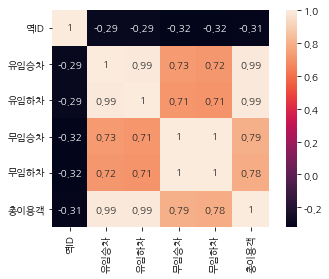

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data=added_subway.corr(), square=True, annot=True)
plt.show()